In [1]:
#Gọi tư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Đọc dữ liệu
data = pd.read_excel('Data_Job.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         15 non-null     int64 
 1   Sex        15 non-null     object
 2   Level      15 non-null     object
 3   Top_Train  15 non-null     object
 4   Year       15 non-null     int64 
 5   Project    15 non-null     object
 6   Result     15 non-null     object
dtypes: int64(2), object(5)
memory usage: 972.0+ bytes


In [5]:
#Hiển thị dữ liệu
data

,ID,Sex,Level,Top_Train,Year,Project,Result
0,175,Nam,Đại học,Không,0,Không,Từ chối
1,217,Nữ,Đại học,Có,1,Có,Đồng ý
2,222,Nữ,Cao đẳng,Không,3,Không,Từ chối
3,310,Nam,Đại học,Có,1,Không,Đồng ý
4,343,Nam,Đại học,Không,2,Không,Đồng ý
5,356,Nam,Đại học,Có,1,Không,Đồng ý
6,432,Nam,Cao đẳng,Không,0,Không,Từ chối
7,477,Nam,Đại học,Không,1,Có,Đồng ý
8,489,Nam,Trung tâm tin học,Không,2,Có,Đồng ý
9,490,Nam,Cao đẳng,Không,0,Không,Từ chối


In [7]:
#Quan sát dữ liệu
data.describe()

,ID,Year
count,15.000000,15.000000
mean,463.733333,1.266667
std,201.660063,1.162919
min,175.000000,0.000000
25%,326.500000,0.000000
50%,477.000000,1.000000
75%,557.000000,2.000000
max,812.000000,3.000000


In [9]:
data.describe(include='O')

,Sex,Level,Top_Train,Project,Result
count,15,15,15,15,15
unique,2,3,2,2,2
top,Nam,Đại học,Không,Không,Đồng ý
freq,12,8,10,10,10


In [13]:
#Chuyển đổi dữ liệu về dạng số
data1 = data.copy()

data1['Sex'] = data1['Sex'].replace({'Nam':0,'Nữ':1}).astype(int)
data1['Level'] = data1['Level'].replace({'Trung tâm tin học':1,'Cao đẳng':2,'Đại học':3}).astype(int)
data1['Top_Train'] = data1['Top_Train'].replace({'Không':0,'Có':1}).astype(int)
data1['Project'] = data1['Project'].replace({'Không':0,'Có':1}).astype(int)
data1['Result'] = data1['Result'].replace({'Từ chối':0,'Đồng ý':1}).astype(int)
data1

,ID,Sex,Level,Top_Train,Year,Project,Result
0,175,0,3,0,0,0,0
1,217,1,3,1,1,1,1
2,222,1,2,0,3,0,0
3,310,0,3,1,1,0,1
4,343,0,3,0,2,0,1
5,356,0,3,1,1,0,1
6,432,0,2,0,0,0,0
7,477,0,3,0,1,1,1
8,489,0,1,0,2,1,1
9,490,0,2,0,0,0,0


In [17]:
#Tách biến độc lập X
X = data1[['Sex','Level','Top_Train','Year','Project']]
X

,Sex,Level,Top_Train,Year,Project
0,0,3,0,0,0
1,1,3,1,1,1
2,1,2,0,3,0
3,0,3,1,1,0
4,0,3,0,2,0
5,0,3,1,1,0
6,0,2,0,0,0
7,0,3,0,1,1
8,0,1,0,2,1
9,0,2,0,0,0


In [19]:
#Tách biến phụ thuộc y
y = data1[['Result']]
y

,Result
0,0
1,1
2,0
3,1
4,1
5,1
6,0
7,1
8,1
9,0


In [21]:
#Khai báo sử dụng thuật toán cây quyết định
from sklearn.tree import DecisionTreeClassifier
#Khai báo mô hình Cây quyết định - sử dụng độ đo: Entropy
Model = DecisionTreeClassifier(criterion='entropy')

In [23]:
#Sử dụng cây quyết định với tập dữu liệu
Model.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

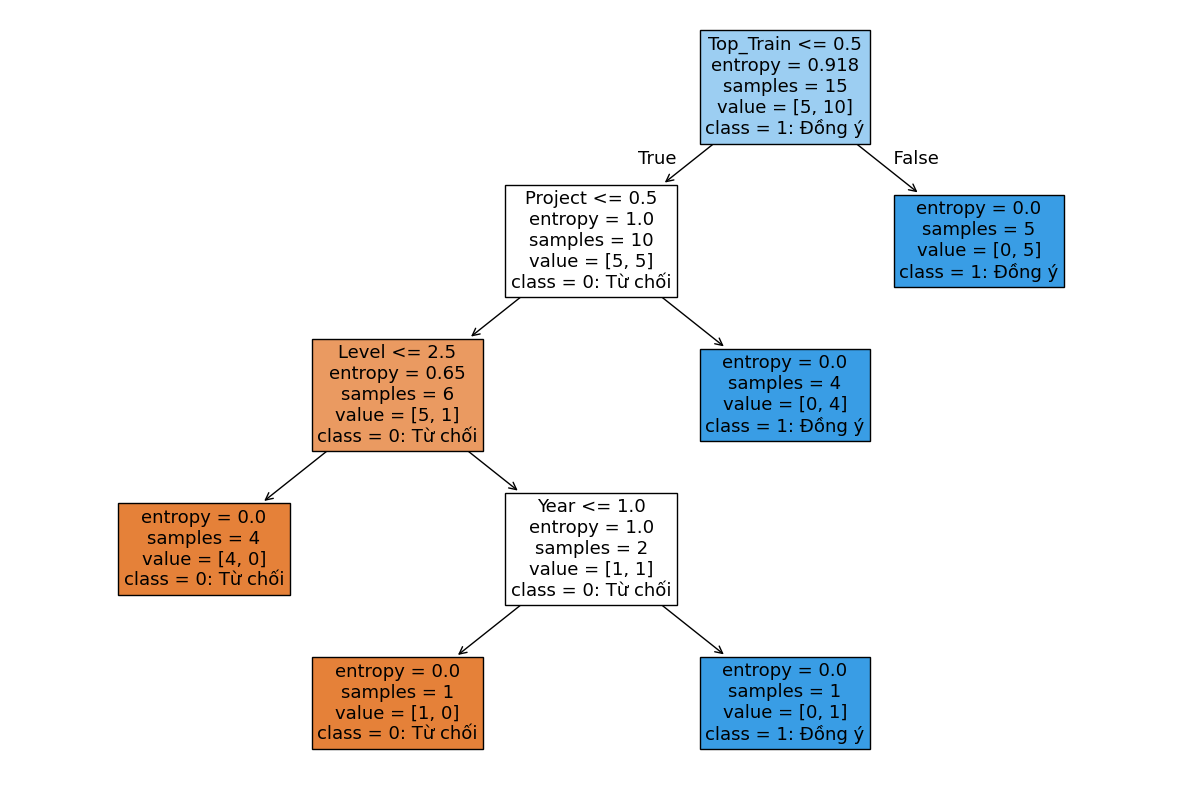

In [33]:
#Hiển thị cây quyết định
from sklearn import tree
fig = plt.figure(figsize=(15,10))

#Đặt tên cho các thuộc tính và các lớp
feature_names = X.columns
target_names = ['0: Từ chối', '1: Đồng ý']
#Hiển thị cây quyết định
tree.plot_tree(Model,
              feature_names=feature_names,
              class_names=target_names,
              filled=True,
              fontsize=13)
plt.show()